Comparitive Market Price: $224,965 at $88/sqft.
The recently sold homes included in the training data set aligned with the following criteria:
- Has a garage
- In College Hill, Crown Heights, Sleepy Hollow, Eastborough, Rockhurst, or Lambsdale
    - (Kellogg to 13th and Hillside to Rock)
- Built between 1910 and 1967
- SQFT between 1290 and 3557

   Beds  Baths  sqft  Year built  price/sqft  outcome (Price)
0     3      2  1290        1910         167           215430
1     3      2  1510        1925         115           173650
2     3      2  1560        1927         133           207480
3     3      2  1575        1950         102           160650
4     3      2  1580        1956         101           159580
    Beds  Baths  sqft  Year built  price/sqft  outcome (Price)
44     3      3  2842        1962          70           198940
45     3      2  2922        1920          87           254214
46     3      3  3026        1937          74           223924
47     3      3  3169      

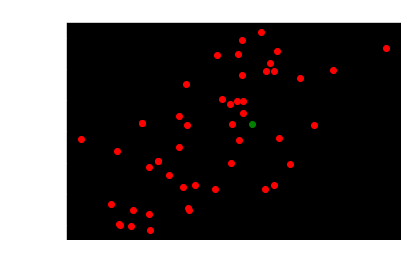

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
path = './'
df = pd.read_csv(f"{path}data/ComparitiveMarketAnalysis.csv", sep=',')

target = "outcome (Price)"
X = df.drop([target, "price/sqft"], axis=1)
y = df[target]
my_home = {'Beds': [3], 'Baths': [2], 'sqft': [2564], 'Year built': [1927]}
my_home = pd.DataFrame(data=my_home)
LR = LinearRegression()
LR.fit(X, y)
prediction = int(LR.predict(my_home).item())
print(f"Comparitive Market Price: ${prediction:,} at ${int(np.round(prediction/my_home.sqft.item()))}/sqft.")
print()
print(f'''The recently sold homes included in the training data set aligned with the following criteria:
- Has a garage
- In College Hill, Crown Heights, Sleepy Hollow, Eastborough, Rockhurst, or Lambsdale
    - (Kellogg to 13th and Hillside to Rock)
- Built between {min(df['Year built'])} and {max(df['Year built'])}
- SQFT between {min(df.sqft)} and {max(df.sqft)}
''')
print(df.head())
print(df.tail())
plt.scatter(df.sqft, y, color='r')
plt.scatter(my_home.sqft.item(), prediction, color='g')
plt.xlabel('sqft')
plt.ylabel('Price, $')
plt.title('Comparitive Market Analysis Price per sqft')
plt.show()
